# Step 1: Data preprocessing

Importing the libraries

In [1]:
import numpy as np
import pandas as pd

Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4:5].values

Feature scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X.astype('float64'))

Splitting the dataset into the training and test sets

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print("%d training exemples and %d test exemples" % (len(X_train), len(X_test)))

300 training exemples and 100 test exemples


c:\users\skybeast\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Step 2: Logistic regression model

Fitting logistic regression to the training set

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier = classifier.fit(X_train, Y_train[:,0])

# Step 3: Prediction

Predicting on the test set

In [6]:
Y_pred = classifier.predict(X_test)

# Step 4: Evaluating the prediction

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Step 5: Visualization

In [8]:
import matplotlib.pyplot as plt

def visualize(mat_X, mat_Y):
    mat_X_positive = mat_X[mat_Y[:,0] == 1]
    mat_Y_negative = mat_X[mat_Y[:,0] == 0]
    
    plt.scatter(mat_X_positive[:,0], mat_X_positive[:,1], color = "green")
    plt.scatter(mat_Y_negative[:,0], mat_Y_negative[:,1], color = "red")
    
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")


Training results

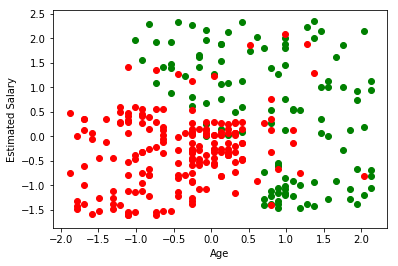

In [9]:
visualize(X_train, Y_train)

Test results

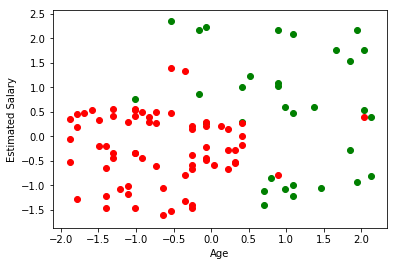

In [10]:
visualize(X_test, Y_test)